### Text Summarization

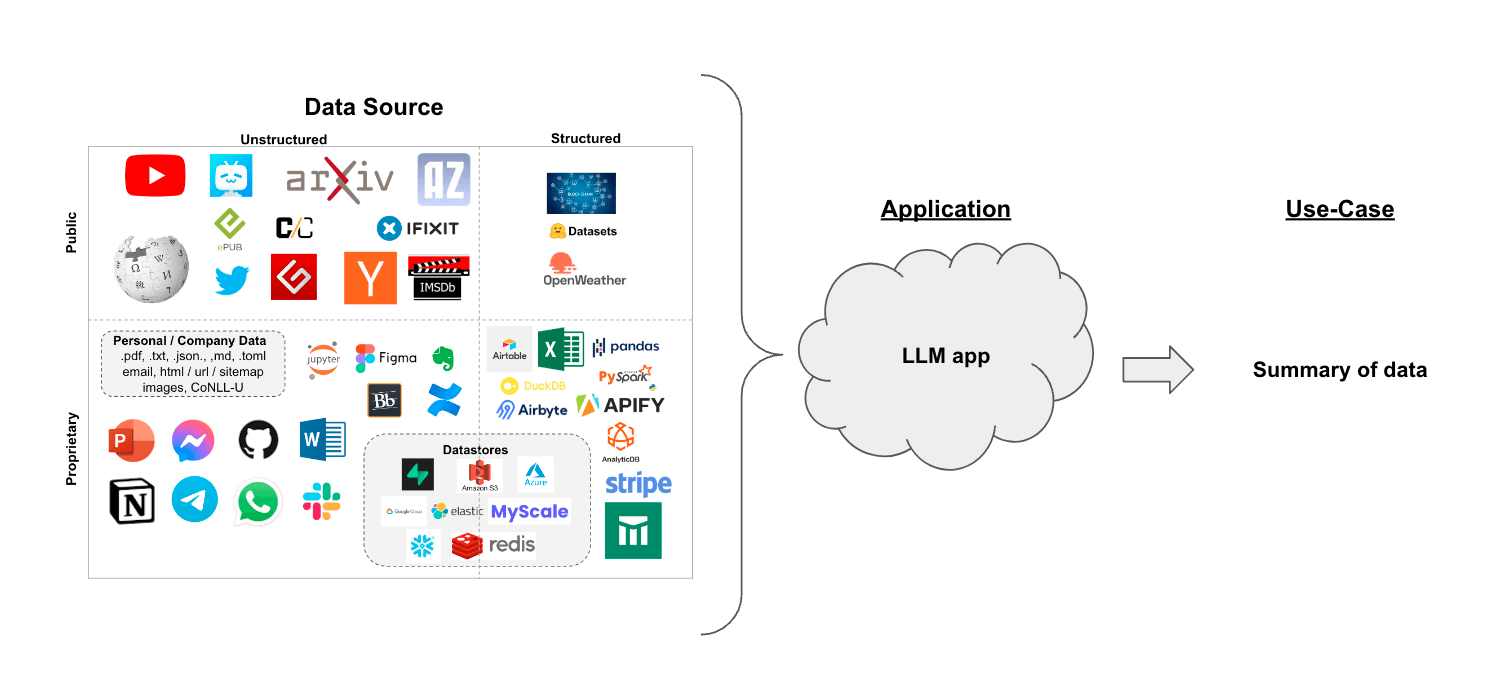

In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [8]:
from langchain_groq import ChatGroq
api_key=os.getenv("GROQ_API_KEY")
llm=ChatGroq(groq_api_key=api_key,model="llama3-70b-8192")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x1193d9510>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x1196b66e0>, model_name='llama3-70b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [9]:
from langchain.schema import(
    AIMessage,
    HumanMessage,SystemMessage
)


In [10]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [11]:
chat_message=[
    SystemMessage(content="You are expert with experise in summarizing speeched"),
    HumanMessage(content=f"Please provide a short and concisse summary of the follow speech:\n Text:{speech}")
]

In [12]:
chat_message


[SystemMessage(content='You are expert with experise in summarizing speeched', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='Please provide a short and concisse summary of the follow speech:\n Text:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries w

In [13]:
llm.get_num_tokens(speech)

909

## Prompt Template Text Summarization

In [15]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

generictemplate="""
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {language}
"""

prompt=PromptTemplate(
    input_variables=['speech','language'],
    template=generictemplate
)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nSpeech:{speech}\nTranslate the precise summary to {language}\n')

In [16]:
complete_prompt=prompt.format(speech=speech,language="French")
complete_prompt

'\nWrite a summary of the following speech:\nSpeech:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses

In [17]:
llm.get_num_tokens(complete_prompt)

931

In [18]:
llm_chain=LLMChain(llm=llm,prompt=prompt)
summary=llm_chain.run({'speech':speech,'language':'hindi'})
summary

/var/folders/zk/l_pq96ms1qvfyjkxyzyz0qgm0000gn/T/ipykernel_66924/228696470.py:1: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  llm_chain=LLMChain(llm=llm,prompt=prompt)
/var/folders/zk/l_pq96ms1qvfyjkxyzyz0qgm0000gn/T/ipykernel_66924/228696470.py:2: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  summary=llm_chain.run({'speech':speech,'language':'hindi'})


"Here is a summary of the speech:\n\nThe speaker, a Member of Parliament, is participating in the 'Viksit Bharat Sankalp Yatra' (Developed India Resolution Journey) to ensure that government schemes reach their intended beneficiaries without hassle. They want to hear from people whether the schemes have made a positive impact in their lives. The speaker believes that it's crucial to check if the schemes have reached those they were meant for, and to ensure that they are not just limited to paperwork and fund allocation. They share stories of people who have benefited from government schemes, such as the Ayushman card and the Jeevan Jyoti scheme, and how these stories have a positive impact on government officers. The speaker believes that the 'Viksit Bharat Sankalp Yatra' has the power to bring about real change by bridging the gap between the rich and the poor.\n\nHindi summary:\n\nभाषण का सारांश:\n\nआज, मैं सांसद के रूप में 'विकसित भारत संकल्प यात्रा' में भाग ले रहा हूं, ताकि सरकार क

## StuffDocumentChain Text summarization

In [19]:
from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'producer': 'GPL Ghostscript 8.15', 'creator': 'PScript5.dll Version 5.2', 'creationdate': 'D:20070730160943', 'moddate': 'D:20070730160943', 'title': 'Microsoft Word - Document1', 'author': 'Shri', 'source': 'apjspeech.pdf', 'total_pages': 7, 'page': 0, 'page_label': '1'}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those livi ng abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealt

In [20]:
template=""" Write a concise and short summary of the following speech,
Speech :{text}

 """
prompt=PromptTemplate(input_variables=['text'],
                      template=template)


In [21]:
from langchain.chains.summarize import load_summarize_chain

chain= load_summarize_chain(llm=llm,chain_type="stuff" ,prompt=prompt, verbose=True)

In [22]:
output_summary=chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
 Write a concise and short summary of the following speech,
Speech :A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those livi ng abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online in

'Here is a concise and short summary of the departing speech of A.P.J. Abdul Kalam:\n\nIn his farewell speech, President Kalam reflected on his five-year tenure, expressing gratitude to the nation and its people. He shared 10 important messages, including the need to accelerate development, empower villages, and mobilize rural resources. He emphasized the importance of youth movement, connectivity for societal transformation, and defending the nation. He also highlighted the need for a value-based education system and a corruption-free governance. He envisioned a developed India by 2020, where there is equitable distribution of resources, quality education, and healthcare for all. He concluded by thanking the nation and reiterating his mission to connect the hearts and minds of the people, instilling self-confidence that "we can do it."'

### Map reduce to Summarize Large documents

In [23]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [26]:
loader = PyPDFLoader("_OceanofPDF.com_AI_Engineering_Building_Applications_-_Chip_Huyen.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'producer': 'calibre 7.4.0', 'creator': 'calibre 7.4.0', 'creationdate': '2024-12-07T18:13:04+00:00', 'author': 'Chip Huyen', 'moddate': '2024-12-07T18:13:04+00:00', 'title': 'AI Engineering (for True Epub)', 'source': '_OceanofPDF.com_AI_Engineering_Building_Applications_-_Chip_Huyen.pdf', 'total_pages': 991, 'page': 1, 'page_label': '2'}, page_content='Praise for AI Engineering\nThis book offers a comprehensive, well-structured guide to the\nessential aspects of building generative AI systems. A must-read for\nany professional looking to scale AI across the enterprise.\n—Vittorio Cretella, former global CIO, P&G and Mars\nChip Huyen gets generative AI. On top of that, she is a remarkable\nteacher and writer whose work has been instrumental in helping\nteams bring AI into production. Drawing on her deep expertise, AI\nEngineering serves as a comprehensive and holistic guide,\nmasterfully detailing everything required to design and deploy\ngenerative AI applications

In [29]:
final_documents=RecursiveCharacterTextSplitter(chunk_size=4000,chunk_overlap=500).split_documents(docs)
final_documents


[Document(metadata={'producer': 'calibre 7.4.0', 'creator': 'calibre 7.4.0', 'creationdate': '2024-12-07T18:13:04+00:00', 'author': 'Chip Huyen', 'moddate': '2024-12-07T18:13:04+00:00', 'title': 'AI Engineering (for True Epub)', 'source': '_OceanofPDF.com_AI_Engineering_Building_Applications_-_Chip_Huyen.pdf', 'total_pages': 991, 'page': 1, 'page_label': '2'}, page_content='Praise for AI Engineering\nThis book offers a comprehensive, well-structured guide to the\nessential aspects of building generative AI systems. A must-read for\nany professional looking to scale AI across the enterprise.\n—Vittorio Cretella, former global CIO, P&G and Mars\nChip Huyen gets generative AI. On top of that, she is a remarkable\nteacher and writer whose work has been instrumental in helping\nteams bring AI into production. Drawing on her deep expertise, AI\nEngineering serves as a comprehensive and holistic guide,\nmasterfully detailing everything required to design and deploy\ngenerative AI applications

In [30]:
len(final_documents)

988

In [ ]:
chunks_prompt="""
Please summarize the below book:
book:'{text}'
Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [32]:
final_prompt='''
Provide the final summary of the entire book with the important points.
Add a Title, Start the precise summary with an introduction and provide the summary in number 
points for the book.
Book:{text}

'''
final_prompt_template=PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire book with the important points.\nAdd a Title, Start the precise summary with an introduction and provide the summary in number \npoints for the book.\nBook:{text}\n\n')

In [33]:
summary_chain=load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    map_prompt=map_prompt_template,
    combine_prompt=final_prompt_template,
    verbose=True
)

output=summary_chain.run(final_documents)
output



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech:
Speech:`Praise for AI Engineering
This book offers a comprehensive, well-structured guide to the
essential aspects of building generative AI systems. A must-read for
any professional looking to scale AI across the enterprise.
—Vittorio Cretella, former global CIO, P&G and Mars
Chip Huyen gets generative AI. On top of that, she is a remarkable
teacher and writer whose work has been instrumental in helping
teams bring AI into production. Drawing on her deep expertise, AI
Engineering serves as a comprehensive and holistic guide,
masterfully detailing everything required to design and deploy
generative AI applications in production.
—Luke Metz, cocreator of ChatGPT, former research
manager at OpenAI
Every AI engineer building real-world applications should read this
book. It’s a vital guide to end-to-end AI system design, from model
development a

KeyboardInterrupt: 